In [4]:
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.document_loaders.json_loader import JSONLoader
from langchain.document_loaders import DirectoryLoader, TextLoader
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from dotenv import load_dotenv

# Load the environment variables
load_dotenv()

True

In [5]:
DRIVE_FOLDER = "train/train"
loader = DirectoryLoader(DRIVE_FOLDER, glob='**/*.json', show_progress=True, loader_cls=TextLoader)
data_full_text = loader.load()
len(data_full_text)

100%|██████████| 754/754 [00:00<00:00, 17978.08it/s]


754

In [6]:
embeddings = OpenAIEmbeddings()
vectors = embeddings.embed_documents([x.page_content for x in data_full_text])
len(vectors)

754

In [7]:
len(vectors[0])

1536

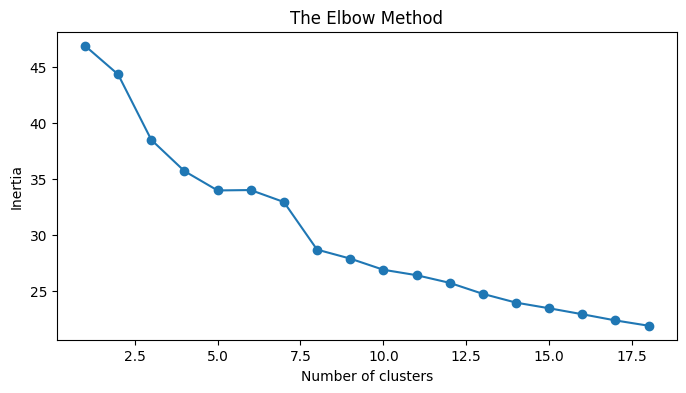

In [8]:
# Applying KMeans clustering on cleaned data with range of clusters
inertia = []
for k in range(1, 19):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(vectors)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 19), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [9]:
# loader = JSONLoader(
#     file_path='test.json',
#     jq_schema=".ocr[].text",
#     text_content=False)
#
# data = loader.load()
# print(f'document count: {len(data)}')
# data

In [10]:
# # Load the vectorstore
# faiss_index = FAISS.from_documents(data_full_text, embeddings)
# faiss_index.save_local("faiss_index")
# faiss_db = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)

In [11]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
#
# # Taking out the warnings
# import warnings
# from warnings import simplefilter
#
# # Filter out FutureWarnings
# simplefilter(action='ignore', category=FutureWarning)
#
# # Perform t-SNE and reduce to 2 dimensions
# tsne = TSNE(n_components=2, random_state=42)
# reduced_data_tsne = tsne.fit_transform(vectors)
#
# # Plot the reduced data
# plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.title('Book Embeddings Clustered')
# plt.show()